In [4]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
s = '''4, 11, 3
4, 9, 2, 1, 2
4, 9, 2, 1, 2
4, 11, 3
4, 9, 5
4, 9, 5
5, 7, 6
0, 17, 1
1, 15, 2'''

In [34]:
im = '''000011111111111000
000011111111100100
000011111111100100
000011111111111000
000011111111100000
000011111111100000
000001111111000000
111111111111111110
011111111111111100
'''
im2 = '''000111000
111111111
111000111
001111100
001010100'''

In [2]:
def rle_compress(im_str):
    """
    Compress black-white image in form of plain text with run length method
    """
    ans = []
    
    for line in im_str.splitlines():
        # Initialize 
        w = 0
        b = 0
        res = []
        
        # Process 1st character separately to set white value to 0 in case of black first
        if line.startswith('0'):
            w += 1
        else:
            res.append(w)
            b += 1
        
        # Process characters in rest of line - 
        # Determine current
        # Increment its counter
        # Dump value of previous character counter to res if there was a change of color
        for i in line[1:]:
            if i == '1':
                b += 1
                if w != 0:
                    res.append(w)
                    w = 0
            else:
                w += 1
                if b != 0:
                    res.append(b)
                    b = 0     
        # Dump results of last character
        if b:
            res.append(b)
        else:
            res.append(w)
        
        # Dump line compressing results to the answer
        ans.append(res)
    return ans

In [12]:
def rle_decompress(compressed):
    """
    Decompress rle compressed image string back to image string
    """
    image_string = ['']
    
    for line in s.splitlines():
        ii = cycle(('0', '1'))
        for m in line.split(', '):
            i = next(ii)
            image_string[-1] += (i * int(m))
        image_string.append('')
    return '\n'.join(image_string)

In [17]:
print(rle_decompress(rle_compress(rle_decompress(s))))

000011111111111000
000011111111100100
000011111111100100
000011111111111000
000011111111100000
000011111111100000
000001111111000000
111111111111111110
011111111111111100



In [31]:
arr = list(map(lambda x: list(map(int, list(x))), im2.splitlines()))

In [32]:
arr

[[0, 0, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 0, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1]]

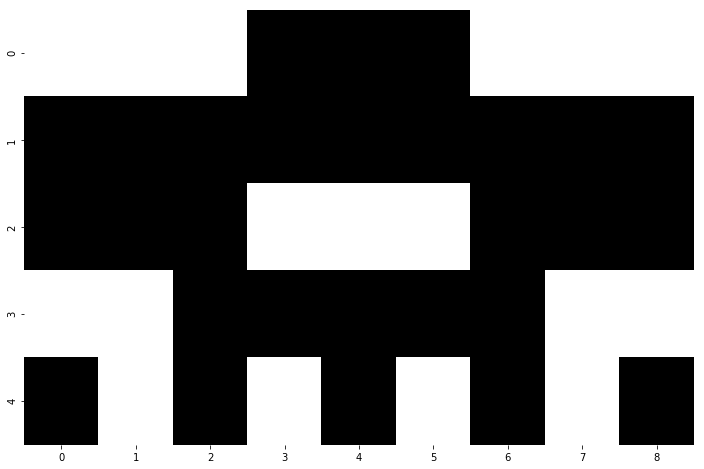

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(arr, cmap=['white', 'black'], cbar=False)